In [2]:
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
from DS_Planck_Unet import west_val, east_val
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm
from DS_data_transformation import this_ax
from DS_models_stat import b20_coef

In [3]:
max_pred_unite = np.arange(0.1, 1, 0.05)
max_found_val = 250

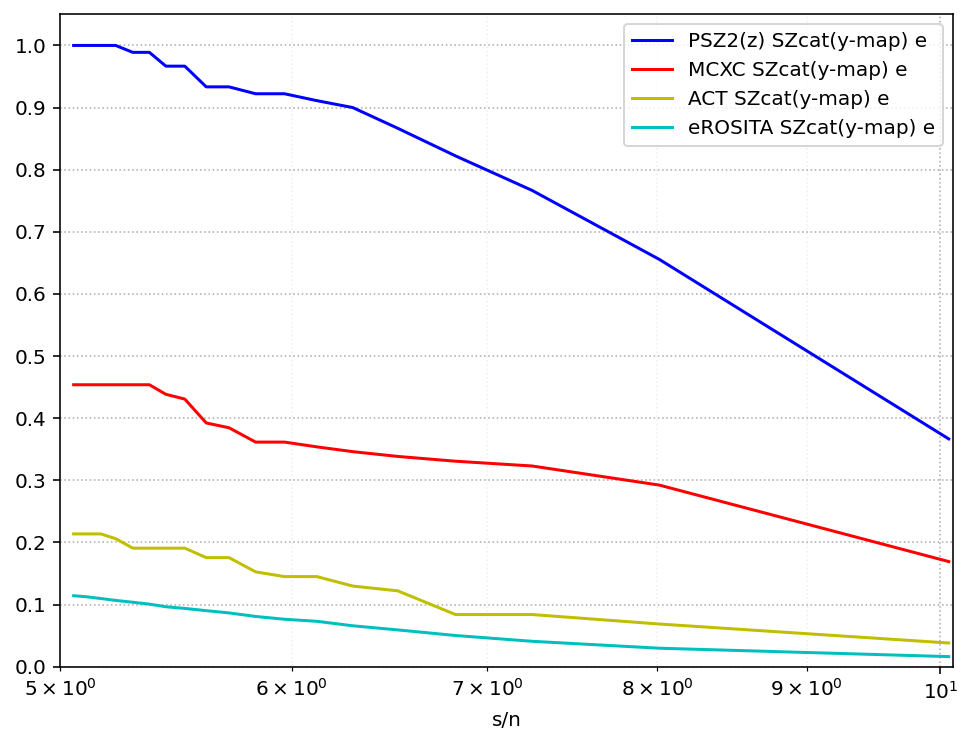

In [8]:
def show_prm(ax, pixname, selected_det, selected_tr, index_name='max_pred', ylabel='', xlim=[0, 1], xticks=None,
            only_plot=False, colors='brycg', found_mode=False, coef=1.0, xlog=False, fylim=[0, 200], fyticks=[0, 200, 50]):
    #cats = ['SZcat(base)',  'SZcat(AL)', 'brcat', 'gen', 'SZcat(AL)_unique', 'inter', 'brcat_unique']
    recalls = {name : pd.read_csv('./check/{}_recall_{}_pix{}.csv'.format(name, index_name.replace('/', ''), pixname), 
                                  index_col=index_name)
                  for name in selected_det}

    for c, name_tr in zip(colors, selected_tr):
        for name_det, st in zip(recalls, ['-', '--']):
            df = recalls[name_det]
            s, = ax.plot(df.index, df[name_tr] * coef, c=c, linestyle=st)
            s.set_label(name_tr + ' ' + name_det + ' ' + pixname)
    if not only_plot:
        ax.set_ylabel(ylabel)
        ax.set_xlabel(index_name)

        if xticks is None:
            xticks = df.index
        ax.set_xticks(xticks, minor=False)
        ax.set_xlim(xlim)
        if xlog:
            ax.set_xscale('log')
        
        if not found_mode:
            ax.set_yticks(np.arange(0, 1.1, 0.1), minor=False)
            ax.set_ylim(0, 1.05)
        else:
            ax.set_yticks(np.arange(*fyticks))
            ax.set_ylim(*fylim)

        ax.grid(True, axis='both', which='major', linestyle=':')
        ax.grid(True, axis='both', which='minor', alpha=0.2, linestyle=':')
        ax.legend()

_, ax = plt.subplots(1, 1, figsize=(8, 6))
show_prm(ax, 'e', selected_det=['SZcat(y-map)'], selected_tr=['PSZ2(z)', 'MCXC', 'ACT','eROSITA'],
           index_name='s/n', xlim=[5.0, 10.1], xlog=True)
#show_prm(ax, 'e', selected_det=['gen'], selected_tr=['PSZ2(z)', 'MCXC', 'ACT', 'Abell', 'eROSITA'],
#           index_name='mpp', dirname='./check/', xlim=[0.3, 1])

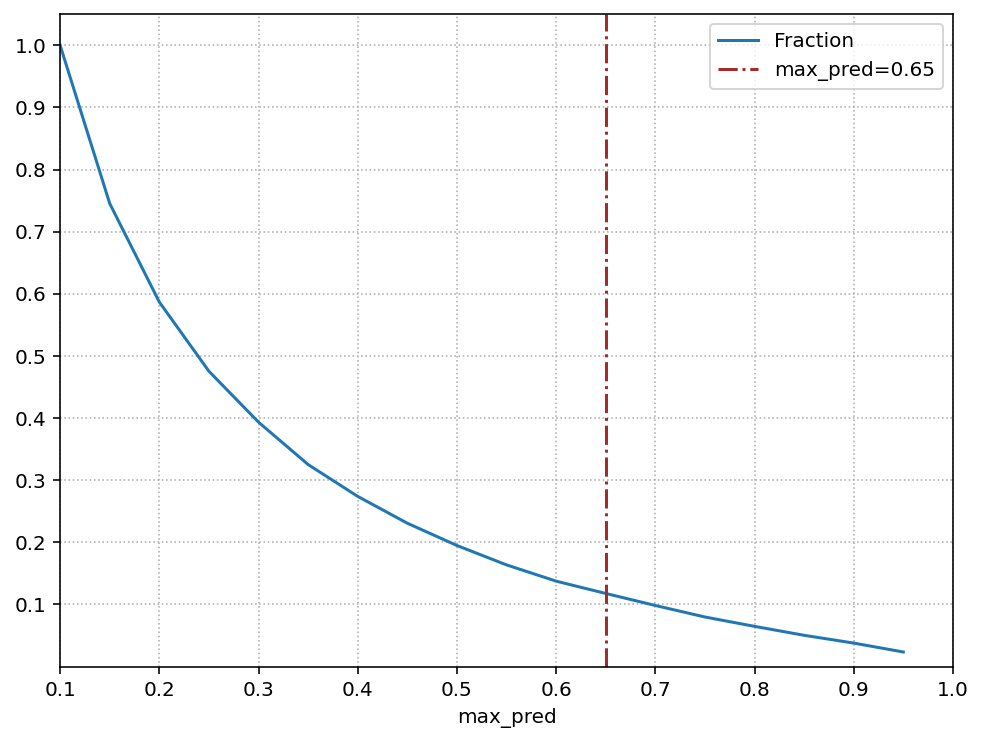

In [6]:
#fraction
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
fraction = []
for val in max_pred_unite:
    fraction.append(np.count_nonzero(df['max_pred'] >= val) / len(df))

_, ax = plt.subplots(1, 1, figsize=(8, 6))
l, = ax.plot(max_pred_unite, fraction)
l.set_label('Fraction')
this_ax(ax)

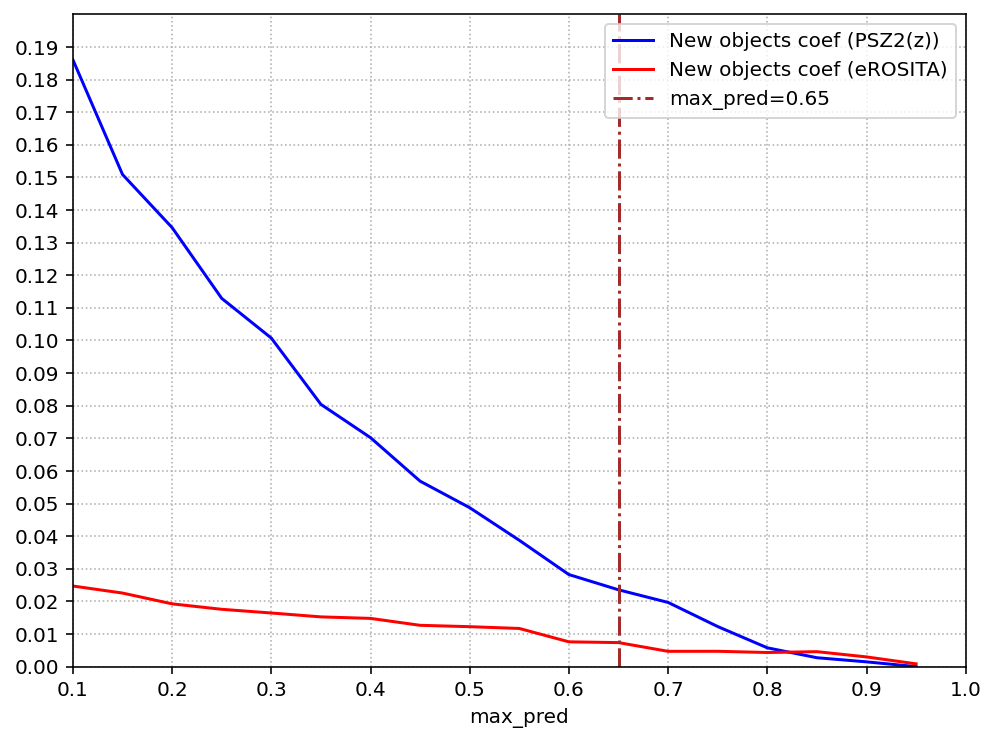

In [7]:
def get_precision_dif(pixname, cat='PSZ2(z)'):
    recall = pd.read_csv('./check/all_found34_recall_max_pred_pix{}.csv'.format(pixname), index_col='max_pred')
    return recall['precision'] - recall['precision_'+cat]

_, ax = plt.subplots(1, 1, figsize=(8, 6))
precision_dif = get_precision_dif(pixname='41')
l, = ax.plot(max_pred_unite, precision_dif * fraction, c='b')
l.set_label('New objects coef (PSZ2(z))')
precision_dif = get_precision_dif(pixname='e', cat='eROSITA')
precision_dif = np.clip(precision_dif, 0, 1)
l, = ax.plot(max_pred_unite, precision_dif * fraction, c='r')
l.set_label('New objects coef (eROSITA)')
this_ax(ax, ylim=[0, 0.2], yticks=[0, 0.2, 0.01])

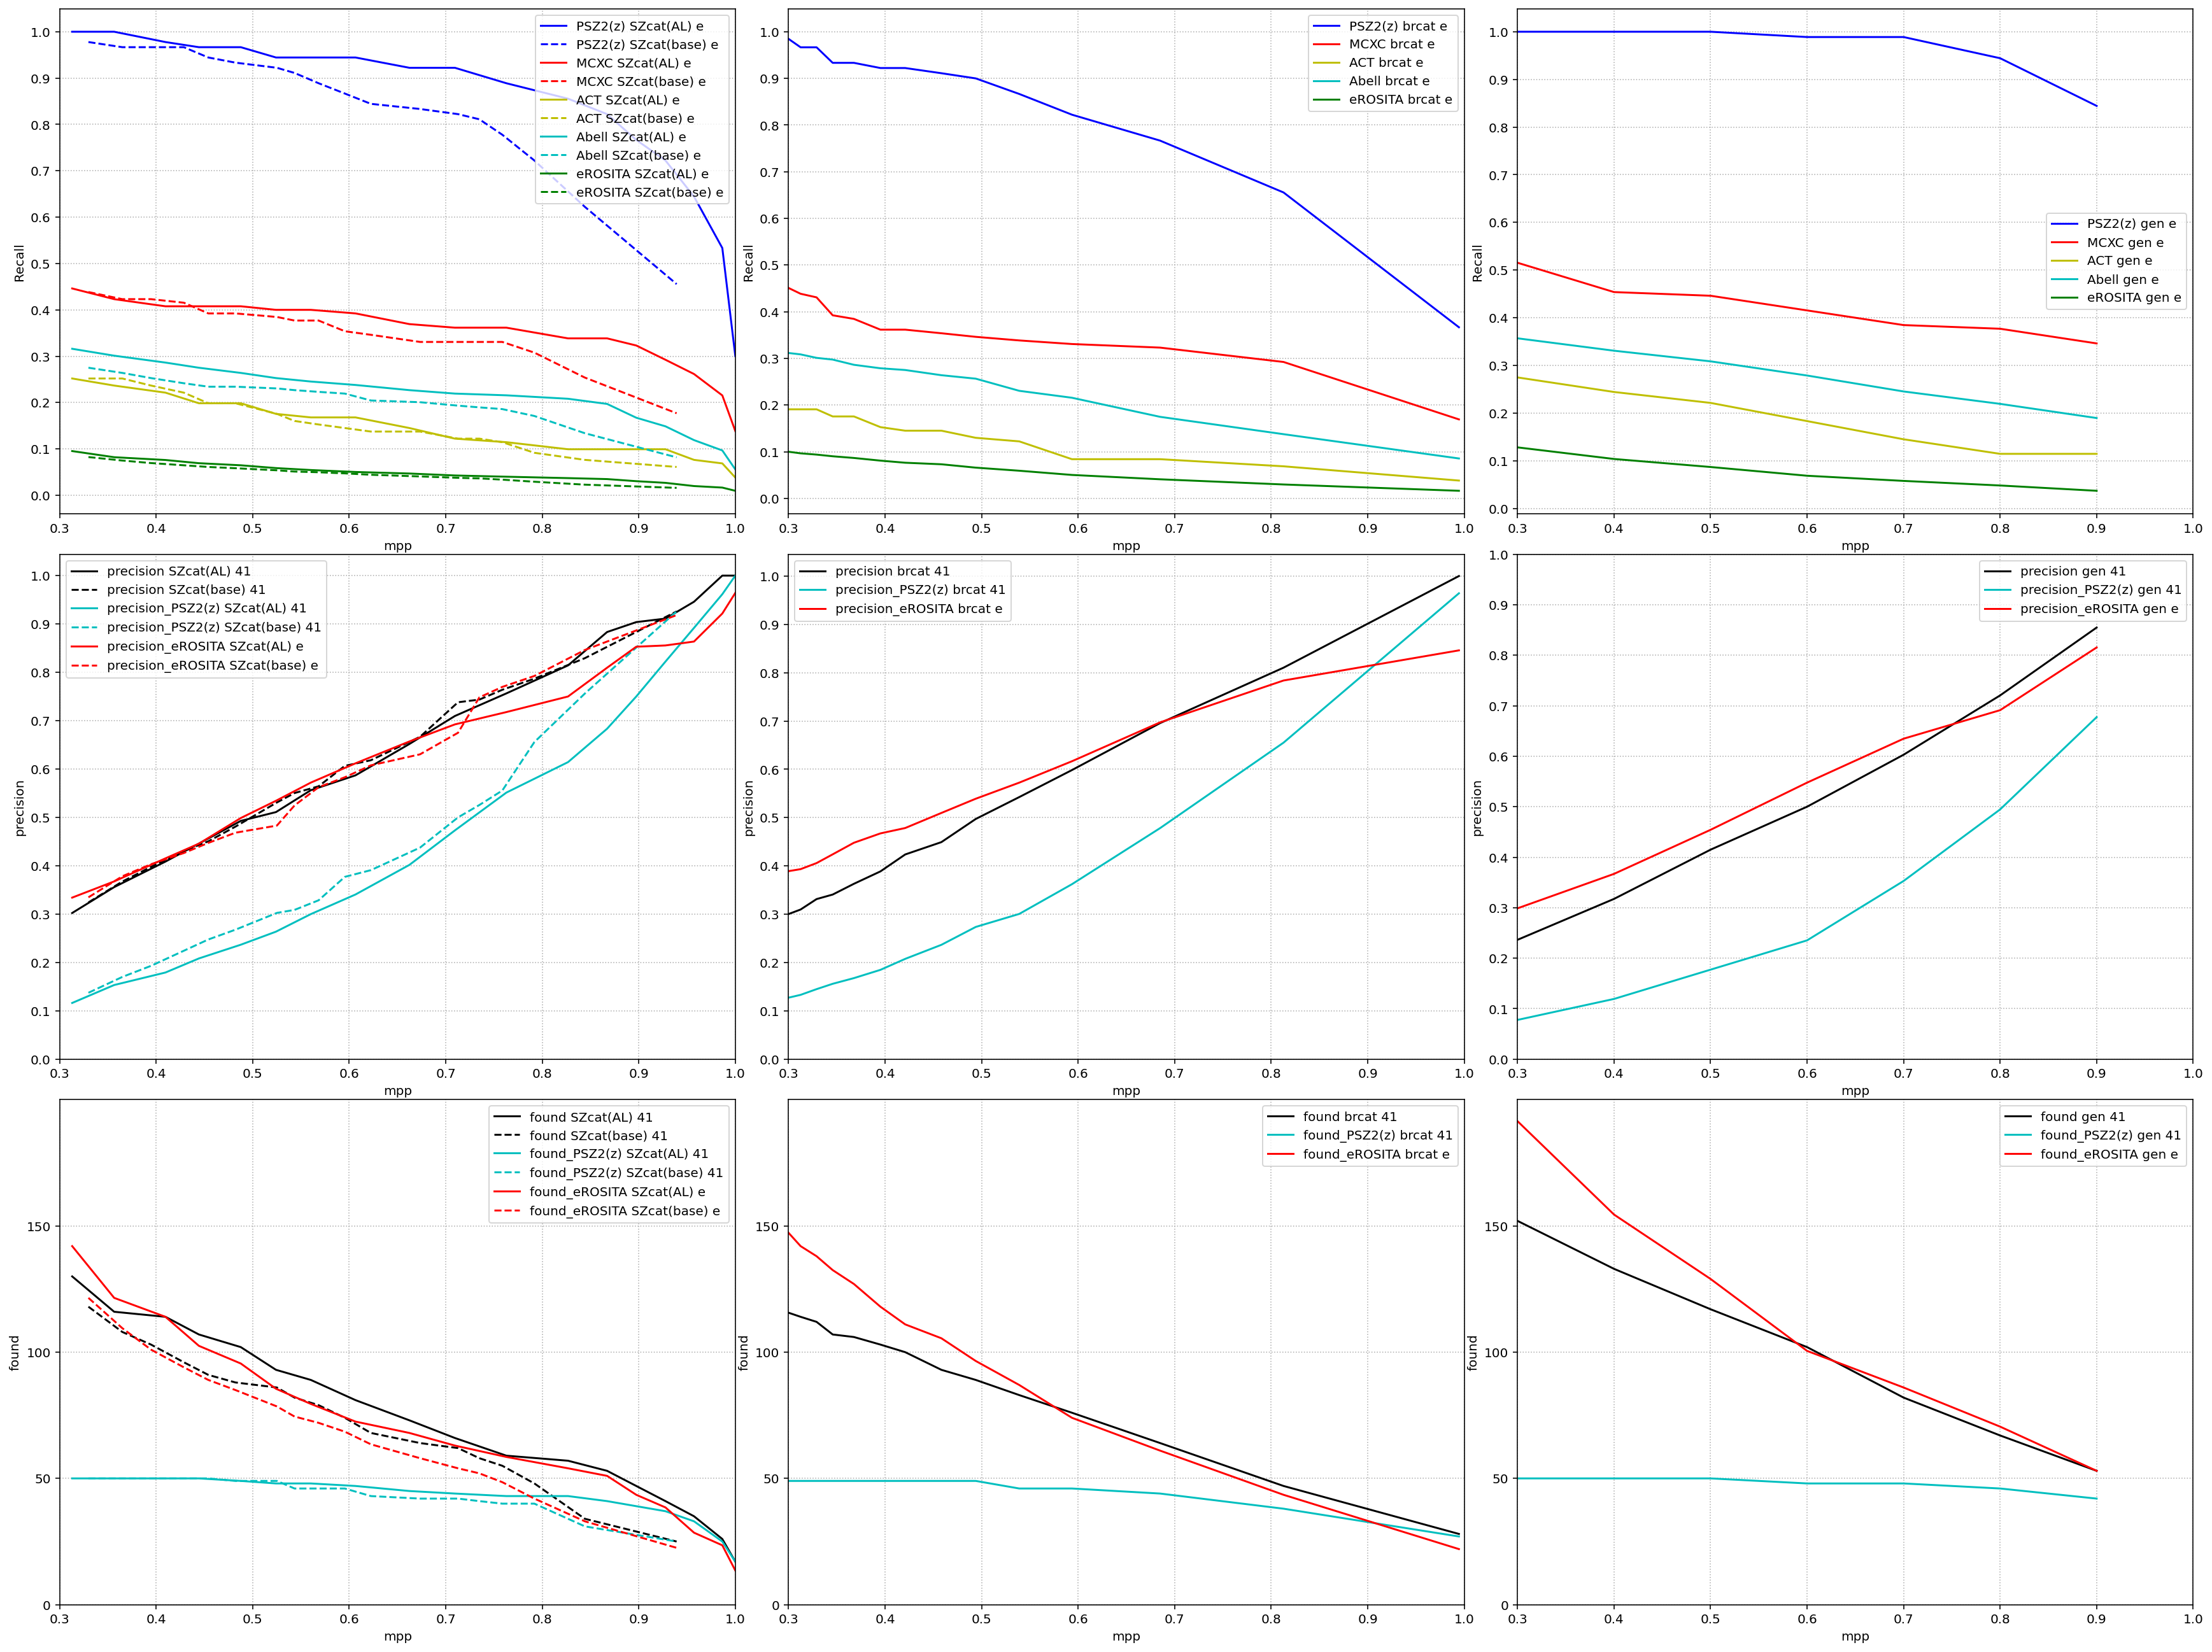

In [119]:
_, ax = plt.subplots(3, 3, figsize=(24, 18), sharey=False)
plt.tight_layout()
selected_tr = ['PSZ2(z)', 'MCXC', 'ACT', 'Abell', 'eROSITA']
pixname='e'
xticks=np.arange(0.1, 1.1, 0.1)
xlim=[0.3, 1.0]
ylabel='Recall'
index_name='mpp'
dirname='./check/mpp/'
for i, selected_det in enumerate((['SZcat(AL)', 'SZcat(base)'], ['brcat'], ['gen'])):
    show_prm(ax[0][i], pixname, selected_tr=selected_tr, selected_det=selected_det, xticks=xticks, xlim=xlim, ylabel=ylabel, 
             index_name=index_name, dirname=dirname)
    for j, prm in enumerate(['precision', 'found']):
        coef=1.0
        show_prm(ax[1+j][i], '41', selected_det=selected_det, selected_tr=[prm, prm+'_PSZ2(z)'], colors='kc', only_plot=True, 
                 index_name=index_name, dirname=dirname)
        if prm == 'found':
            coef=1/2
        show_prm(ax[1+j][i], 'e', selected_det=selected_det, selected_tr=[prm+'_eROSITA'], colors='r', 
                 index_name=index_name, dirname=dirname, xticks=xticks, xlim=xlim, ylabel=prm, found_mode=prm=='found', coef=coef)


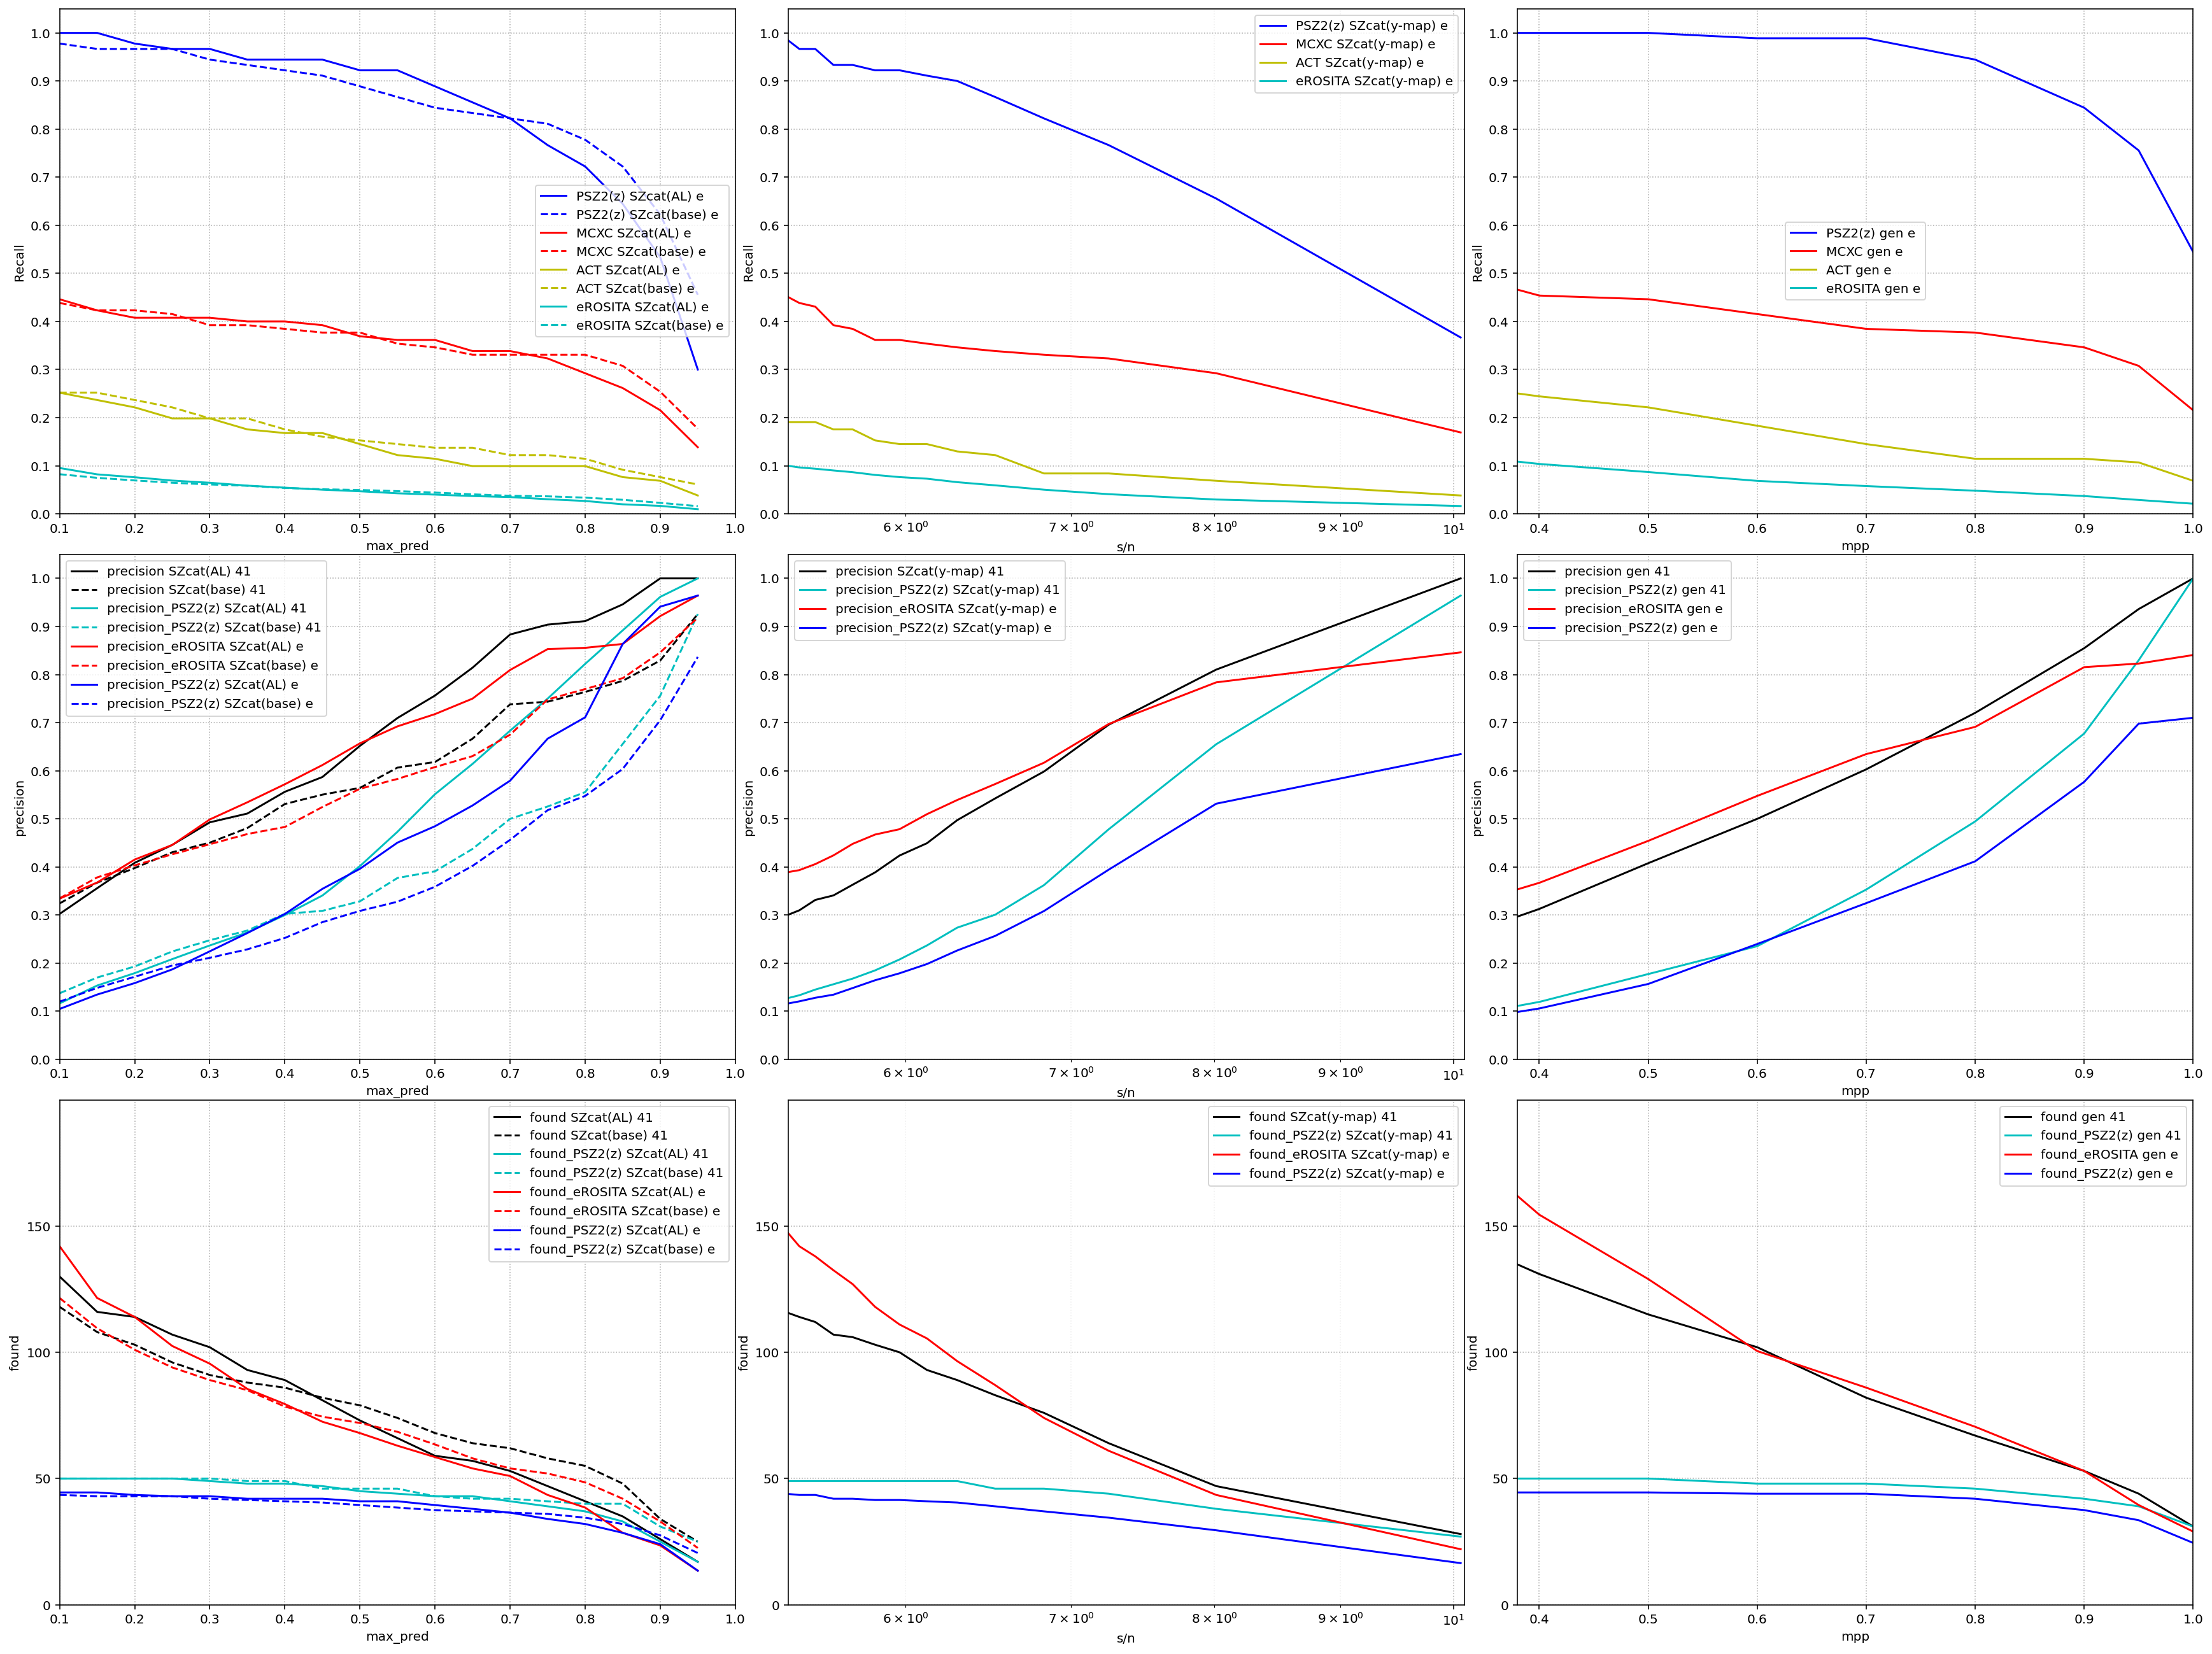

In [10]:
_, ax = plt.subplots(3, 3, figsize=(24, 18), sharey=False)
plt.tight_layout()
selected_tr = ['PSZ2(z)', 'MCXC', 'ACT', 'eROSITA']
pixname='e'
xlim=[0.3, 1.0]
ylabel='Recall'
#index_name='mpp'
for i, (selected_det, index_name) in enumerate(zip((['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['gen']), ['max_pred', 's/n', 'mpp'])):
    xticks=np.arange(0.1, 1.1, 0.1)
    xlim = [0.1, 1.0]
    xlog=False
    if i == 1:
        xticks=None
        xlim=[5.38, 10.1]
        xlog=True
    if i==2:
        xlim=[0.38, 1.0]
    show_prm(ax[0][i], pixname, selected_tr=selected_tr, selected_det=selected_det, xticks=xticks, 
             xlim=xlim, ylabel=ylabel, 
             index_name=index_name, xlog=xlog)
    for j, prm in enumerate(['precision', 'found']):
        coef=1.0
        show_prm(ax[1+j][i], '41', selected_det=selected_det, selected_tr=[prm, prm+'_PSZ2(z)'], colors='kc', only_plot=True, 
                 index_name=index_name, xlog=xlog)
        if prm == 'found':
            coef=1/2
        show_prm(ax[1+j][i], 'e', selected_det=selected_det, selected_tr=[prm+'_eROSITA', prm+'_PSZ2(z)'], colors='rb', 
                 index_name=index_name,xticks=xticks, xlim=xlim, ylabel=prm, found_mode=prm=='found', coef=coef,
                xlog=xlog)

(0.0, 0.1)

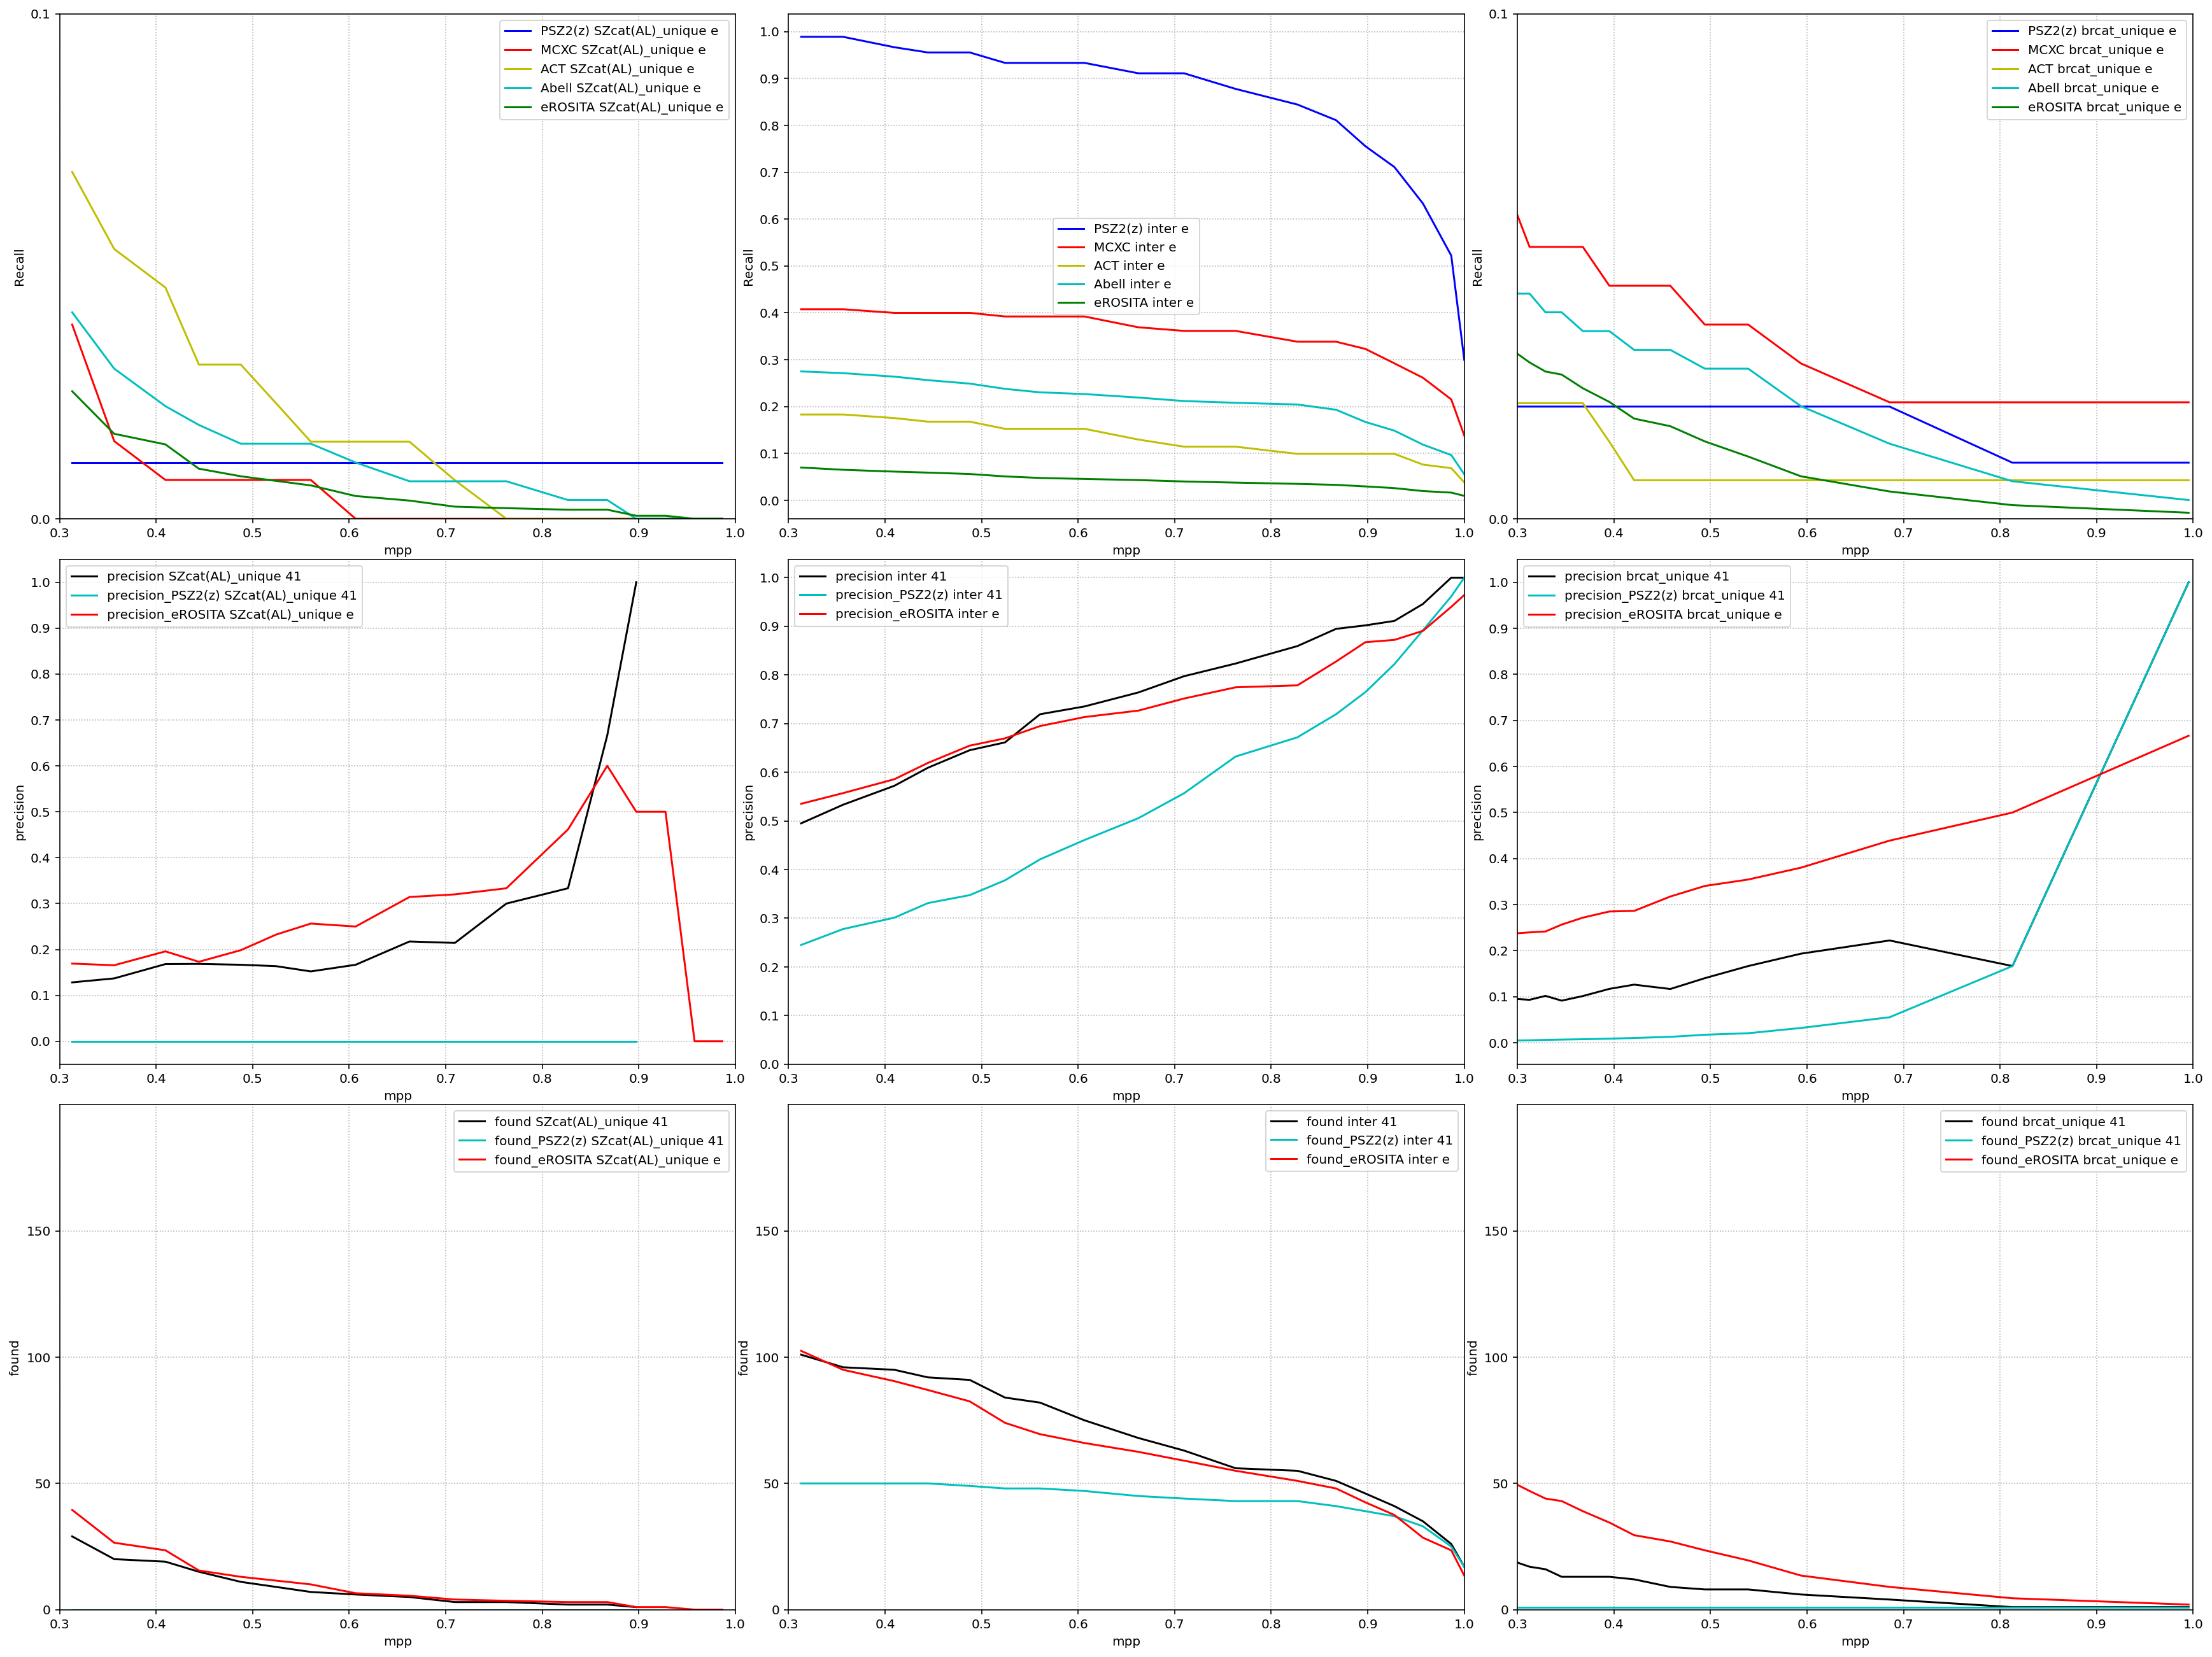

In [124]:
_, ax = plt.subplots(3, 3, figsize=(24, 18), sharey=False)
plt.tight_layout()
selected_tr = ['PSZ2(z)', 'MCXC', 'ACT', 'Abell', 'eROSITA']
pixname='e'
xticks=np.arange(0.1, 1.1, 0.1)
xlim=[0.3, 1.0]
ylabel='Recall'
index_name='mpp'
dirname='./check/mpp/'
for i, selected_det in enumerate((['SZcat(AL)_unique'], ['inter'], ['brcat_unique'])):
    show_prm(ax[0][i], pixname, selected_tr=selected_tr, selected_det=selected_det, xticks=xticks, xlim=xlim, ylabel=ylabel, 
             index_name=index_name, dirname=dirname)
    for j, prm in enumerate(['precision', 'found']):
        coef=1.0
        show_prm(ax[1+j][i], '41', selected_det=selected_det, selected_tr=[prm, prm+'_PSZ2(z)'], colors='kc', only_plot=True, 
                 index_name=index_name, dirname=dirname)
        if prm == 'found':
            coef=1/2
        show_prm(ax[1+j][i], 'e', selected_det=selected_det, selected_tr=[prm+'_eROSITA'], colors='r', 
                 index_name=index_name, dirname=dirname, xticks=xticks, xlim=xlim, ylabel=prm, found_mode=prm=='found', coef=coef)
ax[0][0].set_ylim(0, 0.1)
ax[0][2].set_ylim(0, 0.1)

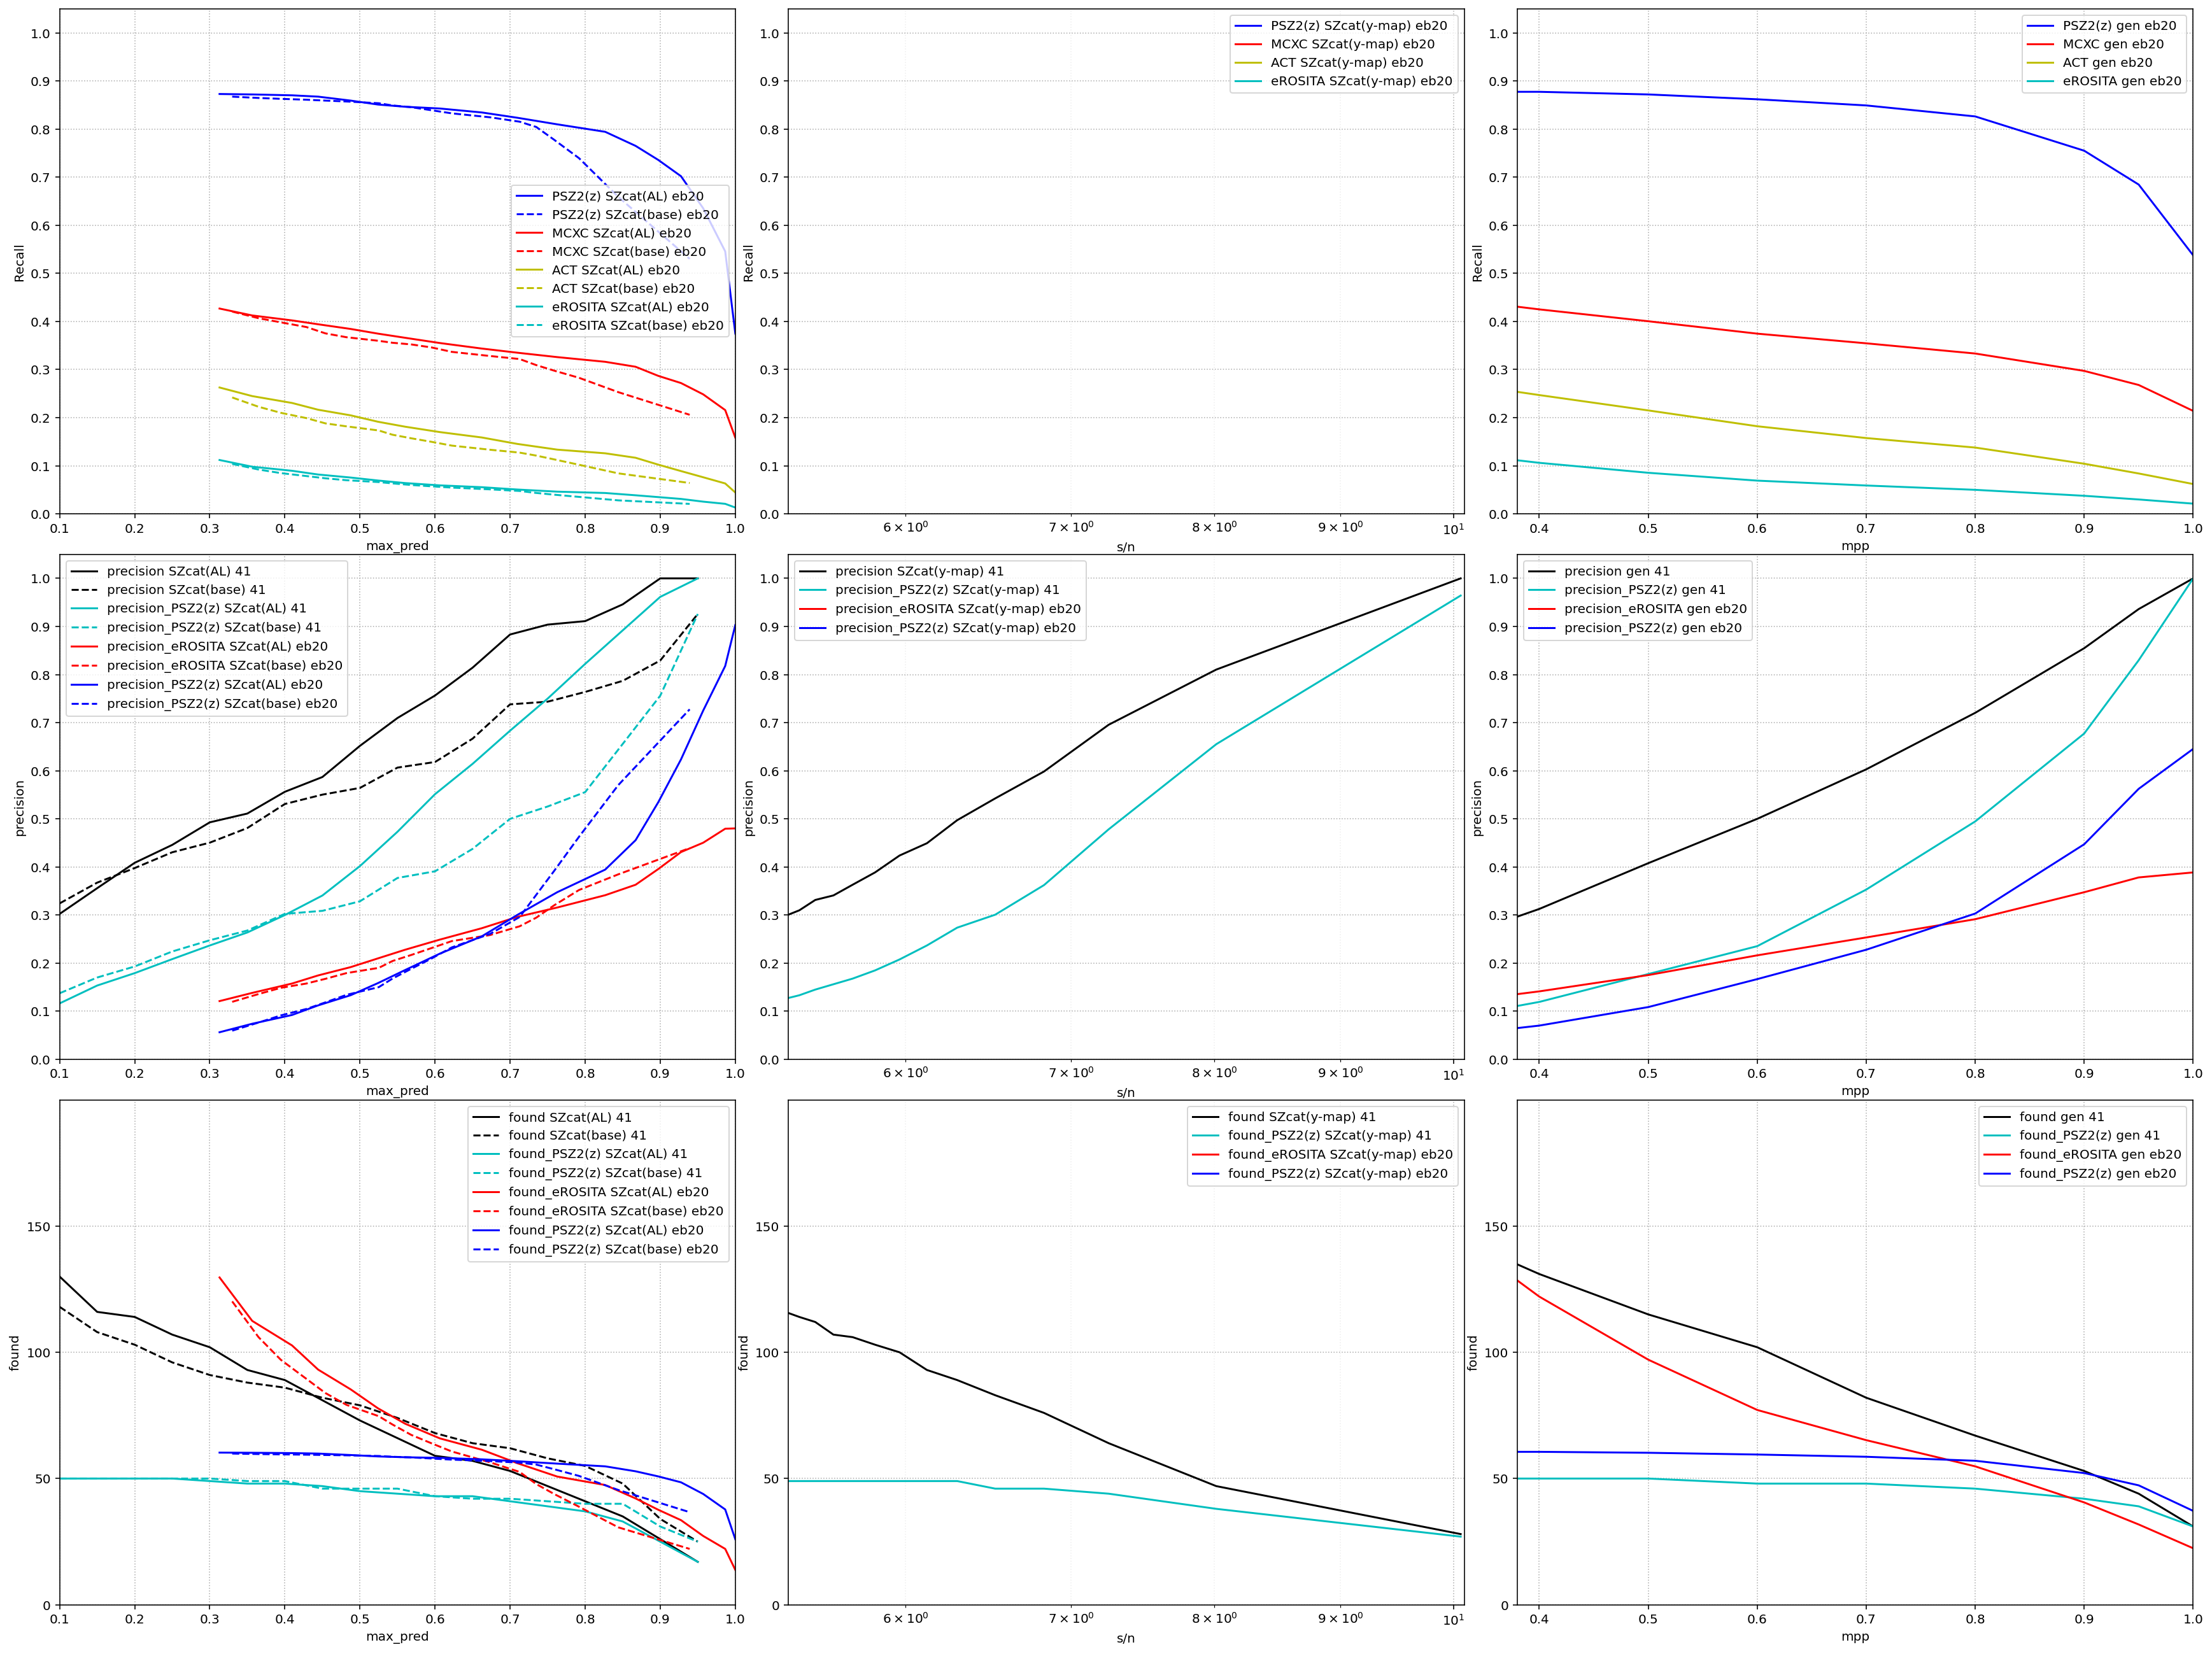

In [13]:
_, ax = plt.subplots(3, 3, figsize=(24, 18), sharey=False)
plt.tight_layout()
selected_tr = ['PSZ2(z)', 'MCXC', 'ACT', 'eROSITA']
pixname='eb20'
xlim=[0.3, 1.0]
ylabel='Recall'
#index_name='mpp'
dirname='./check/'
for i, (selected_det, index_name) in enumerate(zip((['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['gen']), ['max_pred', 's/n', 'mpp'])):
    xticks=np.arange(0.1, 1.1, 0.1)
    xlim = [0.1, 1.0]
    xlog=False
    if i == 1:
        xticks=None
        xlim=[5.38, 10.1]
        xlog=True
    if i==2:
        xlim=[0.38, 1.0]
    show_prm(ax[0][i], pixname, selected_tr=selected_tr, selected_det=selected_det, xticks=xticks, 
             xlim=xlim, ylabel=ylabel, 
             index_name=index_name, xlog=xlog)
    for j, prm in enumerate(['precision', 'found']):
        coef=1.0
        show_prm(ax[1+j][i], '41', selected_det=selected_det, selected_tr=[prm, prm+'_PSZ2(z)'], colors='kc', only_plot=True, 
                 index_name=index_name, xlog=xlog)
        if prm == 'found':
            coef=b20_coef
        show_prm(ax[1+j][i], 'eb20', selected_det=selected_det, selected_tr=[prm+'_eROSITA', prm+'_PSZ2(z)'], colors='rb', 
                 index_name=index_name, xticks=xticks, xlim=xlim, ylabel=prm, found_mode=prm=='found', coef=coef,
                xlog=xlog, fylim=[0, 200])

In [11]:
df = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/other/')
len(df) * b20_coef

6684.075520833333